# **Tesla Stock Price Prediction Using Different Machine Learning Models and Compare the Performance of the Models**💻




The stock price forecast is one of the most preferred topics and most interesting topics in the science industry. However, stock market price forecasts are challenging compared to other price forecasting case studies. Many scholars and industry experts have come to a greater consensus a decade. They have studied stocks in various fields such as Computer Science, Economics, Business Arithmetic, and Marketing price forecasts. The stock has been identified according to them as a random walking behavior at market prices. The sudden rises and falls have been the main reason behind stock market price forecasting being a big challenge. An efficient and accurate. stock market forecasting model will help managers, investors, and decision-makers make the right decisions regarding their investments. Machine learning techniques used to predict stock prices include the analysis of historical data to predict the likelihood of a future event or to predict future performance. This is done by looking at patterns of data that include current and past information and finding the most suitable predictive models.

# 🔲Decision Tree Regression

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

# **Import Libraries**

In [113]:
# Import Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# MATPLOTLIB & SEABORN FOR GRAPH-PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Load data into a Data Frame**

In [114]:
# input
symbol = 'TSLA'
start = '2010-01-01'
end = '2021-12-31'

dataset = pd.read_csv('../dataset/TSLA.csv')
dataset.sample(5)
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


# **Data Preprocessing**

In [115]:
# Create more data
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,-1)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,-1)
dataset['Return'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,0,-1,-1,-0.002511
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,0,-1,-1,-0.078473
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,1,-1,-1,-0.125683
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,1,-1,-1,-0.160937
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,1,-1,1,-0.019243


# **View Dataset**

In [116]:
#View Dataset
dataset

,Date,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,0,-1,-1,-0.002511
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,0,-1,-1,-0.078473
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,1,-1,-1,-0.125683
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,1,-1,-1,-0.160937
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,1,-1,1,-0.019243
...,...,...,...,...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,1,1,1,0.015913
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,1,1,1,0.024854
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,0,1,1,0.102962
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,1,1,1,0.015231


# **Null value testing and data clearance**

In [117]:
# See how many null values in each column

dataset.isnull().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Increase_Decrease    0
Buy_Sell_on_Open     0
Buy_Sell             0
Return               0
dtype: int64

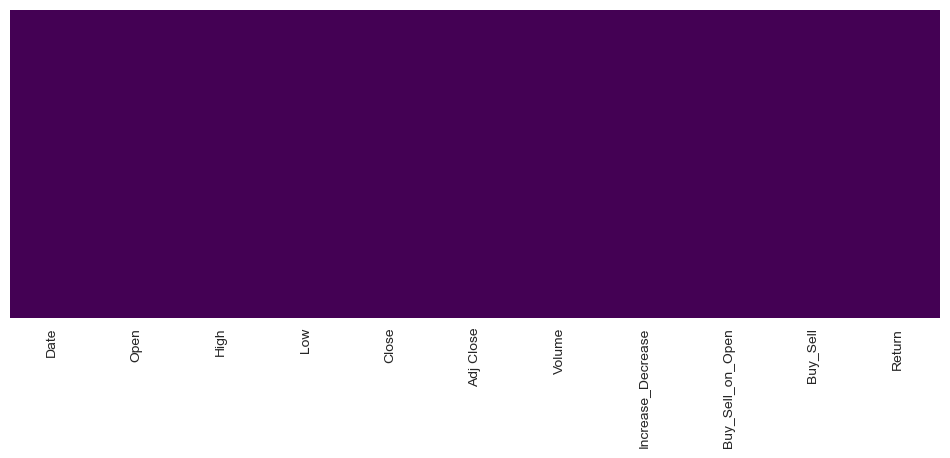

In [118]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

# **Analyze the Data**

In [119]:
# see number of rows, number of columns
dataset.shape

(2415, 11)

In [120]:
#TOTAL NUMBER OF RECORDS
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  26565


In [121]:
# see columns names

dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Increase_Decrease', 'Buy_Sell_on_Open', 'Buy_Sell', 'Return'],
      dtype='object')

In [122]:
# See data types of the Columns

dataset.dtypes

Date                  object
Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume                 int64
Increase_Decrease      int32
Buy_Sell_on_Open       int32
Buy_Sell               int32
Return               float64
dtype: object

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Increase_Decrease'}>,
        <AxesSubplot:title={'center':'Buy_Sell_on_Open'}>,
        <AxesSubplot:title={'center':'Buy_Sell'}>],
       [<AxesSubplot:title={'center':'Return'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

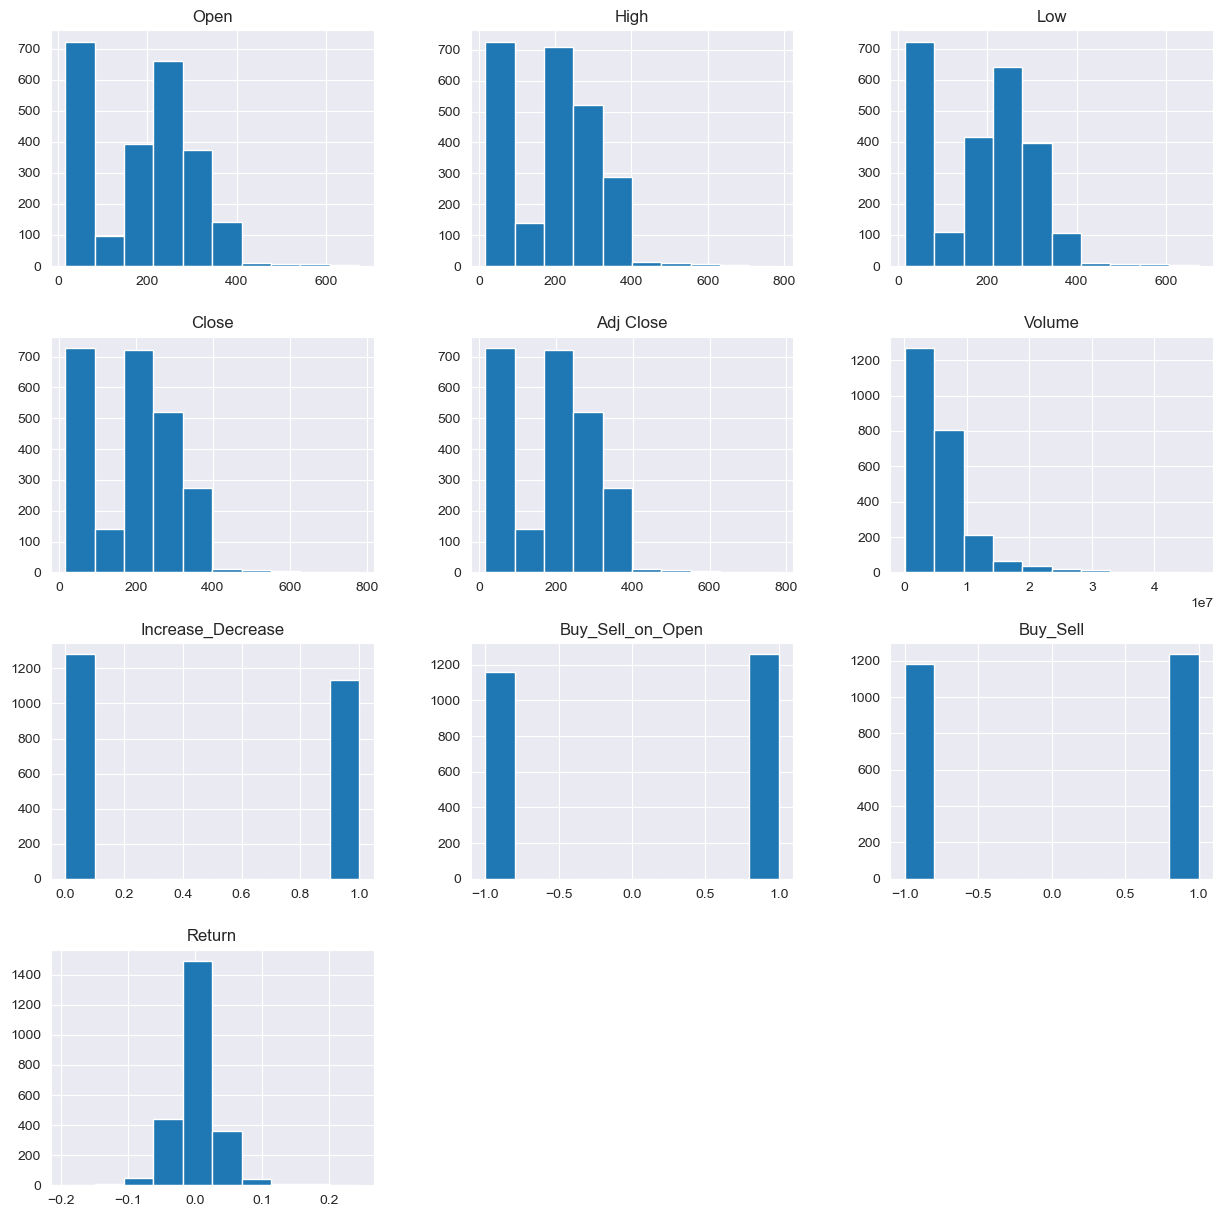

In [123]:
# Histogram per each numerical column

dataset.hist(figsize=(15, 15))

In [124]:
# The statistics per each column

dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return
count,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2.415000e+03,2415.000000,2415.000000,2415.000000,2415.000000
mean,186.340410,189.646373,182.985118,186.470944,186.470944,5.567259e+06,0.469979,0.040994,0.022774,0.001975
std,118.715928,120.870941,116.833297,119.114759,119.114759,4.981607e+06,0.499201,0.999366,0.999948,0.032762
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05,0.000000,-1.000000,-1.000000,-0.193274
25%,34.375000,34.930001,33.650000,34.400002,34.400002,1.897250e+06,0.000000,-1.000000,-1.000000,-0.014178
50%,213.100006,216.750000,208.919998,212.960007,212.960007,4.577200e+06,0.000000,1.000000,1.000000,0.000870
75%,266.450012,270.935012,262.104995,266.779999,266.779999,7.360250e+06,1.000000,1.000000,1.000000,0.018115
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07,1.000000,1.000000,1.000000,0.243951


# **Define X and Y**

In [125]:
X = dataset.drop(['Adj Close', 'Close','Date'], axis=1)
y = dataset['Adj Close'] 

# **Split Train data and Test data**

In [126]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Dataset Traning and Model Traning**

In [127]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

# **Comparison of Actual Values and Predictions Values**

In [128]:
y_pred = regressor.predict(X_test)

In [129]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
print(df.head())
print(df.tail())

          Actual   Predicted
1874  313.260010  312.390015
558    29.480000   29.510000
149    24.100000   24.070000
1138  211.279999  208.169998
1662  251.330002  251.570007
          Actual   Predicted
548    28.410000   28.410000
1599  188.020004  185.020004
1588  199.100006  196.119995
387    27.620001   27.520000
2044  355.489990  356.410004


In [130]:
print(y_test.shape)
print(y_pred.shape)

(483,)
(483,)


# **Accuracy and Loss Function Values of the Model**

In [131]:
from sklearn import metrics  
print('Mean_Absolute_Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean_Squared_Error(MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root_Mean_Squared_Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean_Absolute_Error(MAE): 1.8388824782608708
Mean_Squared_Error(MSE): 9.289009077777067
Root_Mean_Squared_Error(RMSE): 3.047787570972929


In [132]:
from sklearn.model_selection import cross_val_score

dt_fit = regressor.fit(X_train, y_train)
dt_scores = cross_val_score(dt_fit, X_train, y_train, cv = 5)

In [133]:
print("Accuracy score: {:.7f}".format(regressor.score(X_test, y_test)))

Accuracy score: 0.9991718
